#<font color = "orange" size="5rem">**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#<font color = "orange" size="5rem"> **Inserção dos dados**


In [ ]:
data = {'Dia': ["Segunda","Terça","Quarta","Quinta","Sexta","Sabado","Domingo"],
  'Horas_Trabalhadas': [6,7,8,6,7,5,4],
  'Bugs_Corrigidos': [3,2,1,4,3,2,1],
  'Tarefas_Concluídas': [5,4,6,4,5,3,2]}

df = pd.DataFrame(data)
display(df)

,Dia,Horas_Trabalhadas,Bugs_Corrigidos,Tarefas_Concluídas
0,Segunda,6,3,5
1,Terça,7,2,4
2,Quarta,8,1,6
3,Quinta,6,4,4
4,Sexta,7,3,5
5,Sabado,5,2,3
6,Domingo,4,1,2


#<font color = "orange" size="5rem">**Análise do Relatório**





## **Total e média diária de horas trabalhas**

* **Total Total de Horas Trabalhadas: 43**

* **Média Diária de Horas Trabalhadas:**
As horas trabalhadas por dia permanecem em níveis saudáveis, variando entre 4 e 8 horas com média de 6.14 horas de trabalho com uma redução significante no Sabádo e Domingo e consequentemente uma diminuição na produtividade. Isso pode ser atribuído ao fato de que não só por muitos profissionais considerarem esses dias como dias de descanso, mas também devido às leis trabalhistas que garantem uma folga remunerada por semana, de preferência no domingo. Dessa forma, resultando em menor dedicação ao trabalho.







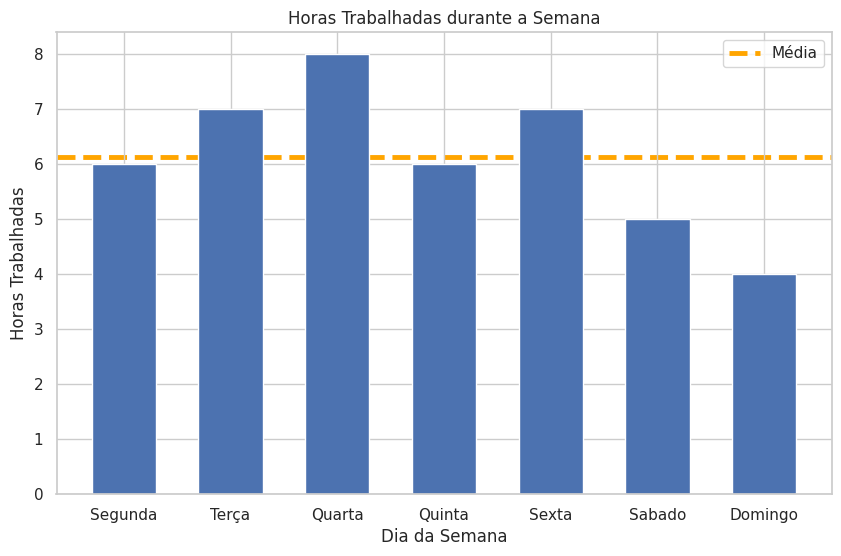

Total de Horas Trabalhadas:43
Média Diária de Horas Trabalhadas:6.14


In [ ]:
# @title

# Realiza o cálculo da média diária de horas trabalhadas e total
media_horas = round(df['Horas_Trabalhadas'].mean(), 2)
total_horas = df['Horas_Trabalhadas'].sum()

#plotando

plt.figure(figsize=(10, 6))
bars = plt.bar(df['Dia'], df['Horas_Trabalhadas'], width=0.6)

# Adicionando uma linha para representar a média
plt.axhline(y=media_horas, color='#FFA500', linestyle='--', label='Média', linewidth=3.5, zorder=0)

# Adicionando rótulos e título
plt.xlabel('Dia da Semana')
plt.ylabel('Horas Trabalhadas')
plt.title('Horas Trabalhadas durante a Semana')


plt.legend()
plt.show()


# Apresentando calculos
print(f'Total de Horas Trabalhadas:{total_horas}')
print(f'Média Diária de Horas Trabalhadas:{media_horas}')


## **Total e média de bugs corrigidos e tarefas concluídas**

* Bugs Corrigidos:
A média de bugs corrigidos por dia é 2.29. Isso indica que, em média, o número de bugs corrigidos diariamente é relativamente baixo, sugerindo que a correção de bugs pode ser uma tarefa que consome mais tempo.

* Tarefas Concluídas:
A média de tarefas concluídas por dia é 4.14. Isso indica que, em média, o número de tarefas concluídas diariamente é razoável, sugerindo uma boa produtividade geral.

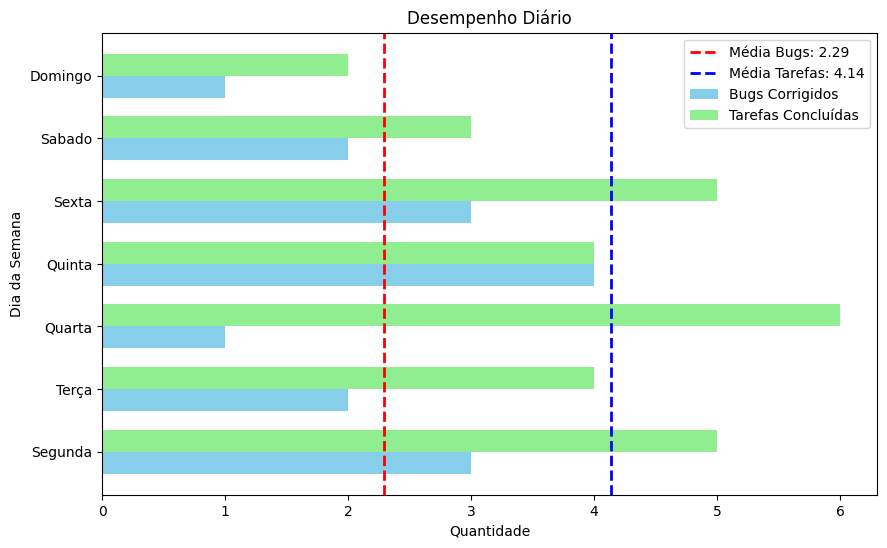

In [ ]:
# @title
# Calculando as médias para bugs corrigidos e tarefas concluídas
media_bugs = round(df['Bugs_Corrigidos'].mean(), 2)
media_tarefas = round(df['Tarefas_Concluídas'].mean(), 2)

# Definindo a altura das barras
bar_height = 0.35

# Definindo as posições das barras
bar_positions = np.arange(len(df['Dia']))

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(bar_positions - bar_height/2, df['Bugs_Corrigidos'], bar_height, color='skyblue', label='Bugs Corrigidos')
plt.barh(bar_positions + bar_height/2, df['Tarefas_Concluídas'], bar_height, color='lightgreen', label='Tarefas Concluídas')

# Adicionando as linhas de média
plt.axvline(x=media_bugs, color='red', linestyle='--', label=f'Média Bugs: {media_bugs}', linewidth=2)
plt.axvline(x=media_tarefas, color='blue', linestyle='--', label=f'Média Tarefas: {media_tarefas}', linewidth=2)

# Adicionando rótulos e título
plt.xlabel('Quantidade')
plt.ylabel('Dia da Semana')
plt.title('Desempenho Diário')
plt.yticks(bar_positions, df['Dia'])
plt.legend()

# Exibindo o gráfico
plt.show()

## **Dispersão dos Bugs Corrigidos por Hora Trabalhada durante a Semana**


> Média e Desvio Padrão: A média de bugs corrigidos por hora trabalhada é 0.38. Isso indica que, em média, a produtividade em termos de bugs corrigidos por hora é relativamente baixa, sugerindo que a correção de bugs pode ser uma tarefa que consome mais tempo. O desvio padrão é 0.18, representando uma variação considerável em relação à média. A porcentagem do desvio padrão em relação à média é 47.32%, o que aponta para uma alta variabilidade na produtividade dos dias da semana.

> Dias Fora do Desvio Padrão:
Quarta e Quinta: Estes dias foram destacados em vermelho no gráfico, indicando que a produtividade nestes dias está fora do intervalo de um desvio padrão da média. Na quarta-feira, a produtividade foi excepcionalmente baixa, e na quinta-feira, excepcionalmente alta.
Quarta-feira: Com uma produtividade de 0.13 bugs corrigidos por hora, significativamente abaixo da média.
Quinta-feira: Com uma produtividade de 0.67 bugs corrigidos por hora, significativamente acima da média.

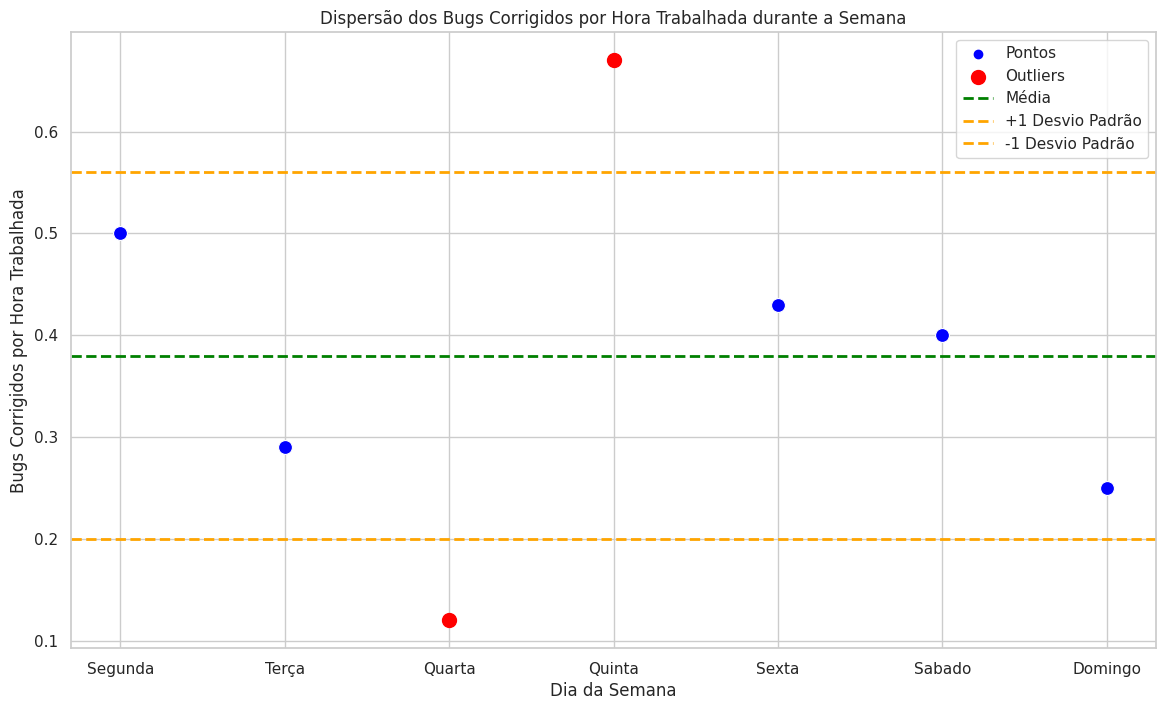

Total: 16
Média: 0.38
Desvio Padrão: 0.18
Porcentagem Desvio/Média [%]: 47.32%
Dias que estão fora do desvio padrão: ['Quarta', 'Quinta']


In [ ]:
# @title
# Cria Tabela copiando duas colunas da Tabela Base
bugs_df = df[["Dia", 'Horas_Trabalhadas',"Bugs_Corrigidos"]].copy()

# Adiciona 1 COLUNA: BUGS/HORA TRABALHADA
bugs_df['Bugs Corrigidos por hora'] = round(bugs_df['Bugs_Corrigidos'] / bugs_df['Horas_Trabalhadas'], 2)

# Calcula média e desvio padrão
total = bugs_df['Bugs_Corrigidos'].sum()
media = bugs_df['Bugs Corrigidos por hora'].mean()
desvio = bugs_df['Bugs Corrigidos por hora'].std()
limite2 = media + desvio
limite1 = media - desvio

# Calculando a porcentagem do desvio padrão em relação à média
porcentagem_desvio_media = (desvio / media) * 100

# Identificando os dias que estão fora do desvio padrão
dias_fora_desvio = bugs_df[(bugs_df['Bugs Corrigidos por hora'] > limite2) | (bugs_df['Bugs Corrigidos por hora'] < limite1)]['Dia'].tolist()

# Criando um gráfico de dispersão
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Gráfico de dispersão
scatter = sns.scatterplot(x='Dia', y='Bugs Corrigidos por hora', data=bugs_df, s=100, color='blue')

# Plotar todos os pontos
plt.scatter(bugs_df['Dia'], bugs_df['Bugs Corrigidos por hora'], color='blue', label='Pontos')

# Destacar outliers
outliers = bugs_df[(bugs_df['Bugs Corrigidos por hora'] > limite2) | (bugs_df['Bugs Corrigidos por hora'] < limite1)]
plt.scatter(outliers['Dia'], outliers['Bugs Corrigidos por hora'], color='red', s=100, label='Outliers')


# Adicionando linhas de média e desvio padrão
plt.axhline(y=media, color='green', linestyle='--', label='Média', linewidth=2)
plt.axhline(y=limite2, color='orange', linestyle='--', label='+1 Desvio Padrão', linewidth=2)
plt.axhline(y=limite1, color='orange', linestyle='--', label='-1 Desvio Padrão', linewidth=2)

# Adicionando rótulos e título
plt.xlabel('Dia da Semana')
plt.ylabel('Bugs Corrigidos por Hora Trabalhada')
plt.title('Dispersão dos Bugs Corrigidos por Hora Trabalhada durante a Semana')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()

# Printando as informações solicitadas
print(f"Total: {total}")
print(f"Média: {media:.2f}")
print(f"Desvio Padrão: {desvio:.2f}")
print(f"Porcentagem Desvio/Média [%]: {porcentagem_desvio_media:.2f}%")
print(f"Dias que estão fora do desvio padrão: {dias_fora_desvio}")

## **Produtividade Diária (Tarefas Concluídas por Hora)**

> Observamos que a produtividade varia ao longo da semana. Segunda e Quinta apresentam os valores mais altos, ambos com uma produtividade de 1.33 tarefas por hora, indicando um início e meio de semana fortes em termos de eficiência. Em contraste, Domingo mostra a menor produtividade, com apenas 0.75 tarefas por hora.
A média de produtividade diária calculada é de 1.04 tarefa por hora, o que sugere um equilíbrio geral ao longo da semana, apesar das flutuações observadas. Essa média pode ser considerada um ponto de referência para avaliar o desempenho diário.
Os dados indicam que há uma tendência de maior produtividade no início e meio da semana, com uma diminuição gradual à medida que se aproxima o fim de semana. Isso pode refletir um padrão comum de trabalho, onde a motivação e energia são maiores após o descanso do fim de semana e começam a diminuir conforme a semana avança.

Média da Produtividade Diária (Tarefas Concluídas por Hora):  1.04 



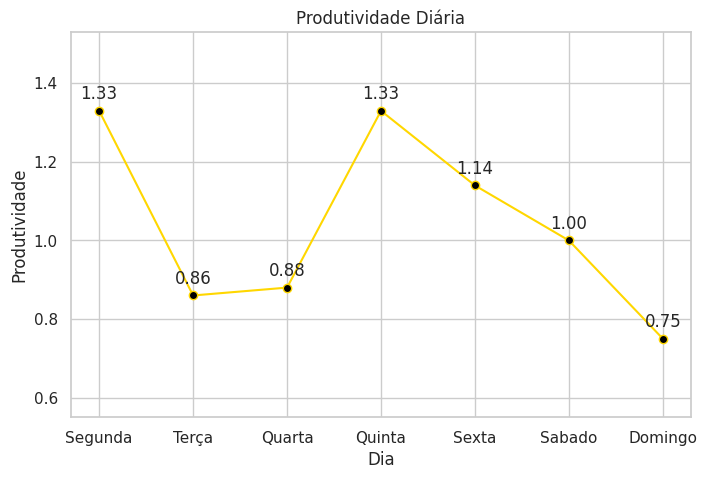

In [ ]:
# @title
# Realiza o calculo de produtividade diária para ser apresentada no gráfico
df['Produtividade_Diaria'] = np.round((df['Tarefas_Concluídas'] + df['Bugs_Corrigidos']) / df['Horas_Trabalhadas'], 2)

print('Média da Produtividade Diária (Tarefas Concluídas por Hora): ', round(df['Produtividade_Diaria'].mean(), 2), '\n\033[0m')


# Gráfico de linha (Produtividade Diária)
plt.figure(figsize=(8, 5))
df['Produtividade_Diaria'].plot(kind='line', color='gold', marker='o', markerfacecolor='black')

# Adicionando os números ao gráfico
for i, txt in enumerate(df['Produtividade_Diaria']):
    plt.text(i, txt + 0.02, f'{txt:.2f}', ha='center', va='bottom')

# Aumentando o Valor máximo de Y para proporcionar melhor visualização dos dados
plt.ylim(min(df['Produtividade_Diaria']) - 0.2, max(df['Produtividade_Diaria']) + 0.2)

plt.title('Produtividade Diária')
plt.xlabel('Dia')
plt.ylabel('Produtividade')
plt.xticks(range(len(df['Dia'])), df['Dia'], rotation=0)
plt.show()